In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

/var/folders/hy/b89vq27x7h1dy617bkzhbwv40000gq/T/ipykernel_37900/924826554.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data/train.csv')
tst_df = pd.read_csv('data/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def proc_data(df):
    df['Fare'] = df.Fare.fillna(0)
    df.fillna(modes, inplace=True)
    df['LogFare'] = np.log1p(df['Fare'])
    df['Embarked'] = pd.Categorical(df.Embarked)
    df['Sex'] = pd.Categorical(df.Sex)

modes = df.mode().iloc[0]

In [6]:
proc_data(df)
proc_data(tst_df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


In [7]:
cats = ["Sex", "Embarked"]
conts=['Age', 'SibSp', 'Parch', 'LogFare', 'Pclass']
dep = "Survived"

In [8]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df, val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)
val_df[cats]

,Sex,Embarked
709,1,0
439,1,2
840,1,2
720,0,2
39,0,0
...,...,...
880,0,2
425,1,2
101,1,2
199,0,2


In [10]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs, df[dep] if dep in df else None

trn_xs, trn_y = xs_y(trn_df)
val_xs, val_y = xs_y(val_df)

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(min_samples_leaf=50).fit(trn_xs, trn_y)
m.fit(trn_xs, trn_y)

DecisionTreeClassifier(min_samples_leaf=50)

In [23]:
import graphviz
import re

def draw_tree(t, df, size = 10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

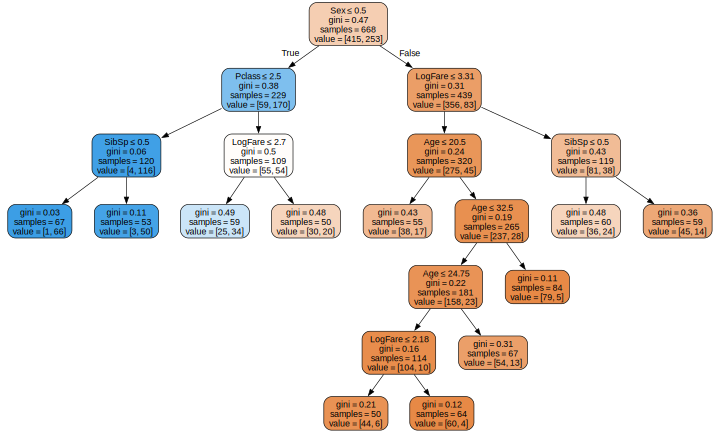

In [24]:
draw_tree(m, trn_xs, size=10)

In [25]:
tst_df[cats] = tst_df[cats].apply(lambda x: x.cat.codes)
tst_xs, _ = xs_y(tst_df)

def subm(preds, suff):
    tst_df['Survived'] = preds
    sub_df = tst_df[['PassengerId', 'Survived']]
    sub_df.to_csv(f'submission_{suff}.csv', index=False)

subm(m.predict(tst_xs), "tree_one")

In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [27]:
clf = HistGradientBoostingClassifier(max_iter=100).fit(trn_xs, trn_y)

In [29]:
clf.score(val_xs, val_y)

0.820627802690583

In [31]:
subm(clf.predict(tst_xs), "HistGradientBoostingClassifier_one")

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(100, min_samples_leaf=5)
rfc.fit(trn_xs, trn_y)
rfc.score(val_xs, val_y)


0.820627802690583

In [43]:
subm(rfc.predict(tst_xs), "rf_one")